## 1.Count words by transversing every characters in this .txt file

## Note: the special form of a word is counted as a new word in the calculation, like: bike and bikes are two different words in the dictionary, Juliet and Juliet'd are two different words, etc. But Juliet and juliet are the same word in this dictionary. 

### Import string package, and generate a string containing all of the punctuations named as punc

In [64]:
import string

punc = string.punctuation

### Create an empty dictionary to hold the words an # of words.

In [65]:
diction = {}

### Create a string without character to memory the word

In [66]:
memory = ''

### Open the file, the file handel is named "RNJ" 

### traverse the text in character

* use function readline() to read a line every time (I don't want to use readlines(), because it will take too much RAM)


* use .upper() to upper all the characters in one line


* N is the # of characters in this line


* traverse this line with for loop


* if the ith character in this line is space or punctuation (except '), and the memory is not empty, then we look up for this memory in the diction's keys with .key() function. If it is not found, then add an new item in this dictionary with key = memory and value = 1. Otherwise, add 1 to the value of the old item with key = memory.


* if the ith character is not space or punctuation, then append this letter to the end of memory

In [67]:
with open("romeoandjuliet.txt") as RNJ:    
    for line in RNJ:
        N = len(line)
        line = line.lower()
        for i in range(0,N-1):
            if line[i] in ' ' or line[i] in punc and line[i] != "'":
                if memory != '':
                    if memory in diction.keys():
                        diction[memory] += 1
                        memory = ''
                    else:
                        diction[memory] = 1
                        memory = ''
                        
            else:
                memory = memory + line[i]


# 2. Sort the dictionary by values according to decreasing word count (sort by words frequency)

## I din't forget the bar plot, I'd like to plot the bar gragh of Frequency-words after the dictionary are sorted~

_packages : numpy, math_

* Dictionary is unorded, so it needs to be transformed into a list with .item() function.

* Set "key" argument of sorted() to lambda items:items[1]. So that it will be sorted by values

* use "mat" function from numpy to turn the list to a matrix so that I can splice it by colume.

* Than I use for loop to traverse this matrix, get an orded list of words counts named Y, an orded list of words named X, an orded list of log(rank), and list of log(N). These lists will be used in making plots.

In [68]:
items = sorted(diction.items(), key = lambda items:items[1], reverse = True)

import numpy as np
items_mat = np.mat(items)

X = []
Y = []

import math

LogY = []
LogN = []
LogRanks = []
Ranks = []
rank = 1
last = int(items_mat[0,1])


for i in range(0,len(items_mat)):
    Y.append(int(items_mat[i,1]))
    X.append(items_mat[i,0])
    LogY.append(math.log(int(items_mat[i,1])))
    LogN.append(math.log(i+1))
    if int(items_mat[i,1]) != last :
        rank += 1
        last =int(items_mat[i,1])
    Ranks.append(rank)
    LogRanks.append(math.log(rank))


## Plot the bar

### this picture is too big for this screen, because I set the figsize to [15,600] to make words on yticks clear to see.

### Maybe you need to use the scroll bar to see the full picture. 

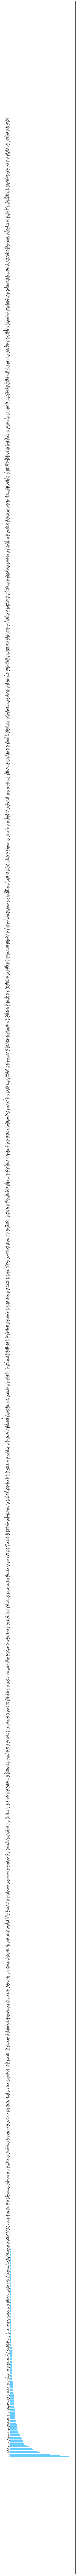

In [69]:
from matplotlib import pyplot as plt
N = range(0,len(items_mat))
plt.figure(figsize = [15,600])
plt.yticks(N,X)

plt.barh(N, Y, color = "#66CCFF")
plt.show()


# Q: What are the ten most frequent words?

# A:

They are "and", "the", "I", "to", "a", "of", "my", "that", "is"

I print them out in the next code block.

In [70]:
print(items_mat[0:9,0])

[['and']
 ['the']
 ['i']
 ['to']
 ['a']
 ['of']
 ['my']
 ['that']
 ['is']]


# Q: What about the least frequent?

# A: 

There are too many words which appear only once, you cannot just tell which ten are the ten least frequent words. So I printed all of them in the next code block. In fact, there are 2143 words.


In [71]:
number = 0
for i in range(0,len(items_mat)):
    if int(items_mat[i,1]) == 1:
        print(items_mat[i,0])
        number += 1

print(number)

tragedy
julietby
william
shakespearedramatis
personae
family
pages
guards
watchmen
households
dignity
grudge
unclean
loins
foes
star
cross'd
misadventur'd
overthrows
passage
mark'd
continuance
children's
hours'
traffic
strive
bucklers
houseof
coals
colliers
collar
moves
runn'st
weakest
weaker
vessels
push
masters
maidenheads
tool
naked
sides
list
disgrace
'better
swashing
heartless
hinds
coward
bills
gown
flourishes
train
rebellious
subjects
profaners
stained
beasts
pernicious
purple
fountains
issuing
throw
mistempered
bred
thrice
disturb'd
wield
freetown
abroach
adversary
fighting
instant
prepar'd
defiance
swung
hiss'd
interchanging
parted
worshipp'd
peer'd
troubled
drave
grove
sycamore
westward
rooteth
city's
walking
stole
covert
wood
measuring
pursuing
shunn'd
augmenting
adding
cheering
furthest
bean
shady
aurora's
steals
pens
artificial
portentous
importun'd
affections'
discovery
bit
dedicate
willingly
step
grievance
denied
seem
went
lengthens
tyrannous
muffled
pathways
dine
brawli

# Q: What might this mean?

# A:

* Prepositions, personal pronouns, conjunctions and articles are the most frequently used words in English. They almost occupy all of the top 10 position.


* Shakespeare has a large vocabulary, he can use different words to express the same meaning. That's the reason why there are so many words which only appear once. I heard that (not verified) that he created more than 1700 new English words.


* Most of the words' count numbers are very small, only a few words appear many times(> 100)

# Plot log[word_count] vs. log[rank]

## I plot two kinds of this log-log picture

### 1.  Parallel Ranking

In this situation, words appear the same times have the same ranking.
(I wrote some other lines to try to fit these scatters into curve or straight line. I did the fit with "scipy" package)


Text(0, 0.5, 'Log[Word_Count]')

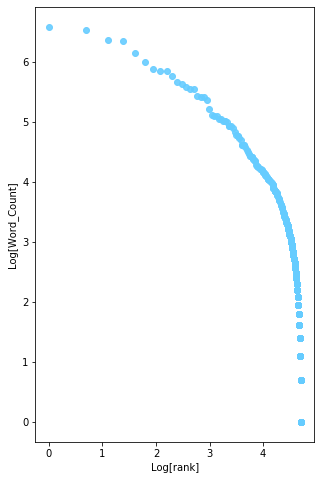

In [72]:
plt.figure(figsize = [5,8])
plot1 = plt.scatter(LogRanks, LogY, alpha = 0.9, color = "#66CCFF")
plt.xlabel("Log[rank]")
plt.ylabel("Log[Word_Count]")


### 2.  Non-parallel ranking

In this situation, words have different ranking numbers though they appear the same times. 

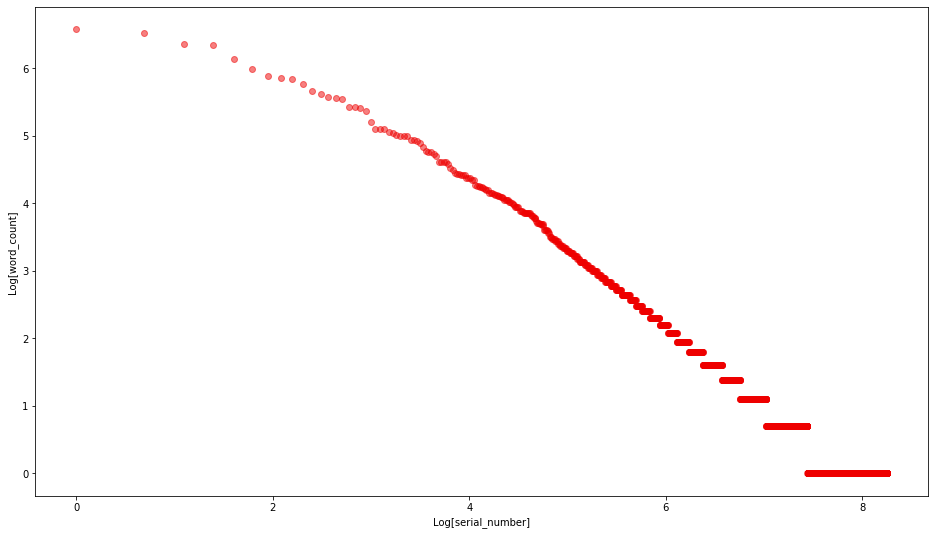

In [73]:
from matplotlib import pyplot as plt
plt.figure(figsize = [16,9])
plot2 = plt.scatter(LogN, LogY, alpha = 0.5, color = "#EE0000")
plt.ylabel('Log[word_count]')
plt.xlabel('Log[serial_number]')
plt.show()

# Q: What does this look like?

# A: 

## For the first picture (parallel ranking)：
This image is like a logarithmic function curve which is translated and rotated.
Most scatters are concentrated on the right hand side of this picture. It indicates that most words have low ranks.

## For the second picture(non-parallel ranking):
This image is like a staircase. The closer a step is to the bottom, the wider the step is. That shows there will be more words share the same frequency if the frequency is low.

# Q: Can you try to interpret this?

# A:

The phenomenon is that "Rare words are common, common words are rare." I think English grammar is one of the most important reasons that are responsible for this feature. Prepositions, personal pronouns, conjunctions and articles are more common than verbs and nouns. 

What's more, this feature of words in Romeo and Juliet is very similar to the situation about variants‘ distribution in a population. That is, "Rare variants are common, whereas common variants are rare." Perhaps it is because the processing of generating and spreading new words can be can be analogized to the processing of generating and spreading new allels. For Shakespeare, he is creative so that he created a lot of new words or used numbers of uncommon words. But few of this kind of words can "survive" during their spread. After all, not everyone is Shakespeare who has a strong language talent.